## Final Project Submission

Please fill out:
* Student name: Hanan Mohamed Maalim
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Mark Tiba
* Blog post URL:


In [91]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline 
import seaborn as sns
import sqlite3
conn = sqlite3.connect('im.db')

In [2]:
# load tmbd_movies dataset
tmdb_movies = pd.read_csv('tmdb.movies.csv')

# Load bom_movie_gross dataset
bom_movie_gross = pd.read_csv('bom.movie_gross.csv')

# Load rt_movie_info dataset
rt_movie_info = pd.read_csv('rt.movie_info.tsv', sep='\t')

# Load movie_budgets dataset
movie_budgets = pd.read_csv('tn.movie_budgets.csv')

# load rt_reviews dataset
rt_reviews = pd.read_csv('rt.reviews.tsv', sep='\t', encoding= 'latin1') 

In [3]:
# displaying information about the dataset
movie_budgets.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [68]:
movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
total_gross          0
release_year         0
release_month        0
dtype: int64

In [7]:
# Checking for Duplicate values
duplicates = movie_budgets[movie_budgets.duplicated()]
len(duplicates)

0

The dataset above does not have any missing values and duplicates

In [9]:
#columns related to budget and gross are currently stored as objects instead of numeric types (integers or floats)
#convert these columns into the appropriate data types (float).
cols_to_clean = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in cols_to_clean:
    movie_budgets[col] = movie_budgets[col].replace('[\$,]', '', regex=True).astype(float)
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [10]:
# Check data types after cleaning
movie_budgets.dtypes

id                     int64
release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object

In [11]:
# Convert 'release_date' column to datetime format
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [12]:
# Display descriptive statistics for budget and revenue columns
print(movie_budgets[['production_budget', 'domestic_gross', 'worldwide_gross']].describe())

       production_budget  domestic_gross  worldwide_gross
count       5.782000e+03    5.782000e+03     5.782000e+03
mean        3.158776e+07    4.187333e+07     9.148746e+07
std         4.181208e+07    6.824060e+07     1.747200e+08
min         1.100000e+03    0.000000e+00     0.000000e+00
25%         5.000000e+06    1.429534e+06     4.125415e+06
50%         1.700000e+07    1.722594e+07     2.798445e+07
75%         4.000000e+07    5.234866e+07     9.764584e+07
max         4.250000e+08    9.366622e+08     2.776345e+09


In [13]:
#determine which movie was watched the most
# Calculate total gross revenue by adding 'domestic_gross' and 'worldwide_gross'
movie_budgets['total_gross'] = movie_budgets['domestic_gross'] + movie_budgets['worldwide_gross']

# Find the movie with the highest total gross revenue
movie_with_highest_gross = movie_budgets.loc[movie_budgets['total_gross'].idxmax()]

print("Movie with the highest total gross revenue:")
print(movie_with_highest_gross[['movie', 'total_gross']])

Movie with the highest total gross revenue:
movie                Avatar
total_gross    3536852904.0
Name: 0, dtype: object


In [16]:
# Display the first few rows of the tmdb_movies dataset to preview its contents
tmdb_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [17]:
# displaying information about the dataset
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [18]:
tmdb_movies.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [19]:
#checking for duplicates
duplicates = tmdb_movies[tmdb_movies.duplicated()]
len(duplicates)

0

tmdb_movies dataset has neither missing values nor duplicates

Performing Exploratory Data Analysis on tmdb_movies dataset
Based on distibution of movie ratings and number of movies released each month


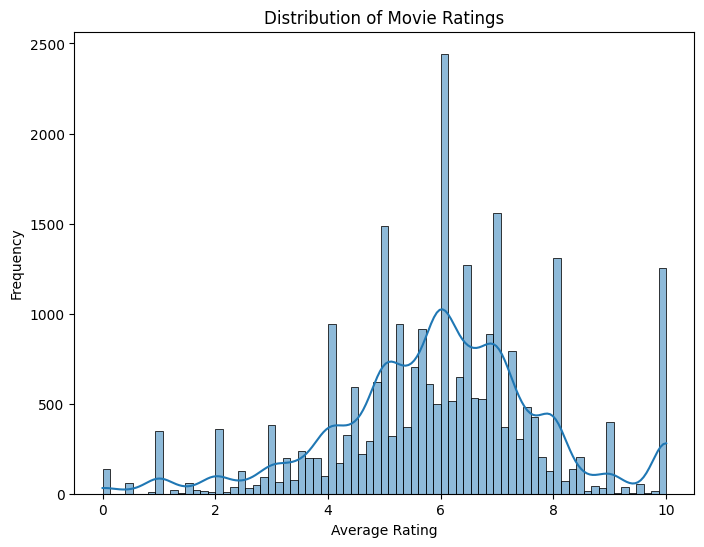

In [66]:
#movie rating analysis
# Plotting a histogram for movie ratings (vote_average)
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.histplot(tmdb_movies['vote_average'], kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()


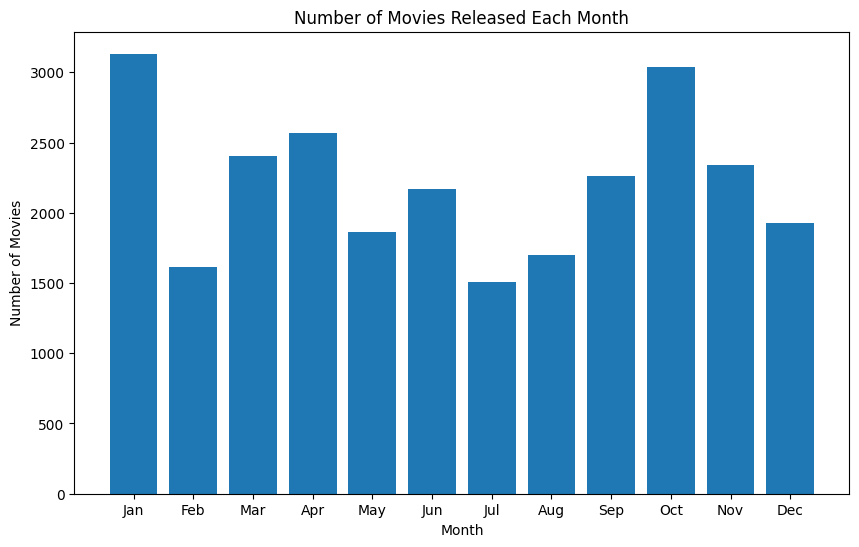

In [70]:
# Plotting number of movies released each month
movies_per_month = tmdb_movies['release_month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(movies_per_month.index, movies_per_month.values)
plt.title('Number of Movies Released Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

From the graphs above,the most frequent average movie rating falls around 6.They were moderately appreciated.
some movies garnered the maximum rating of 10, showcasing their popularity or critical acclaim.
January had the most number of movies released .


In [69]:
#displaying dataset for rotten tomatoes
rt_movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,41032915.0,82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,224114.0,123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,1039869.0,108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,20518224.0,127 minutes,Universal Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...
1530,1968,"This holiday season, acclaimed filmmaker Camer...",PG,Comedy|Drama,Cameron Crowe,Aline Brosh McKenna|Cameron Crowe,"Dec 23, 2011","Apr 3, 2012",$,72700000.0,126 minutes,20th Century Fox
1537,1976,"Embrace of the Serpent features the encounter,...",NR,Action and Adventure|Art House and International,Ciro Guerra,Ciro Guerra|Jacques Toulemonde Vidal,"Feb 17, 2016","Jun 21, 2016",$,1320005.0,123 minutes,Buffalo Films
1541,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,"Sep 30, 2005","Dec 20, 2005",$,25335935.0,119 minutes,Universal Pictures
1542,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,"Oct 5, 2012","Nov 20, 2012",$,1416189.0,129 minutes,Eros Entertainment


In [72]:
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 1 to 1545
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            235 non-null    int64  
 1   synopsis      235 non-null    object 
 2   rating        235 non-null    object 
 3   genre         235 non-null    object 
 4   director      235 non-null    object 
 5   writer        235 non-null    object 
 6   theater_date  235 non-null    object 
 7   dvd_date      235 non-null    object 
 8   currency      235 non-null    object 
 9   box_office    235 non-null    float64
 10  runtime       235 non-null    object 
 11  studio        235 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 32.0+ KB


In [22]:
rt_movie_info.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

There are several missing values for all the columns except id column.
To deal with the missing values,the dataset should be cleaned

In [78]:
#For numerical column like box_office  impute missing values with the mean
# Convert 'box_office' column to numeric (if not already)
rt_movie_info['box_office'] = pd.to_numeric(rt_movie_info['box_office'])

# Fill missing values in 'box_office' column with the mean
rt_movie_info['box_office'].fillna(rt_movie_info['box_office'].mean(), inplace=True)
rt_movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,41032915.0,82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,224114.0,123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,1039869.0,108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,20518224.0,127 minutes,Universal Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...
1530,1968,"This holiday season, acclaimed filmmaker Camer...",PG,Comedy|Drama,Cameron Crowe,Aline Brosh McKenna|Cameron Crowe,"Dec 23, 2011","Apr 3, 2012",$,72700000.0,126 minutes,20th Century Fox
1537,1976,"Embrace of the Serpent features the encounter,...",NR,Action and Adventure|Art House and International,Ciro Guerra,Ciro Guerra|Jacques Toulemonde Vidal,"Feb 17, 2016","Jun 21, 2016",$,1320005.0,123 minutes,Buffalo Films
1541,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,"Sep 30, 2005","Dec 20, 2005",$,25335935.0,119 minutes,Universal Pictures
1542,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,"Oct 5, 2012","Nov 20, 2012",$,1416189.0,129 minutes,Eros Entertainment


In [74]:
rt_movie_info.dropna(subset=['synopsis','currency','runtime','director','writer','studio','theater_date','dvd_date','rating'], inplace=True)
rt_movie_info.head()


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,41032915.0,82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,224114.0,123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,1039869.0,108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,20518224.0,127 minutes,Universal Pictures


The missing values for box office column was imputed with the mean of the column.
The rest of the of the columns that have rows with missing values were dropped.

In [27]:
#confirming that there are no missing values
rt_movie_info.isna().sum()

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
currency        0
box_office      0
runtime         0
studio          0
dtype: int64

Performing Exploratory Data Analysis based on;rating,genre distribution and directors

In [28]:
#analysing the data
#statistical information
rt_movie_info.describe()


,id,box_office
count,235.000000,2.350000e+02
mean,1010.217021,4.195840e+07
std,578.522979,6.263016e+07
min,3.000000,3.630000e+02
25%,488.500000,2.302444e+06
50%,1044.000000,1.553631e+07
75%,1526.000000,5.264952e+07
max,1985.000000,3.680000e+08


In [29]:
#occurence of each rating
rt_movie_info['rating'].value_counts()


rating
R        105
PG-13     77
PG        38
NR         9
G          5
NC17       1
Name: count, dtype: int64

In [79]:
#analysis using genre
#frequency of each unique value
rt_movie_info['genre'].value_counts()


genre
Drama                                                                        33
Comedy                                                                       32
Comedy|Drama                                                                 22
Drama|Mystery and Suspense                                                   11
Comedy|Drama|Romance                                                          9
                                                                             ..
Comedy|Mystery and Suspense                                                   1
Art House and International|Horror|Mystery and Suspense                       1
Art House and International|Comedy|Drama                                      1
Action and Adventure|Art House and International|Comedy|Cult Movies|Drama     1
Action and Adventure|Art House and International                              1
Name: count, Length: 76, dtype: int64

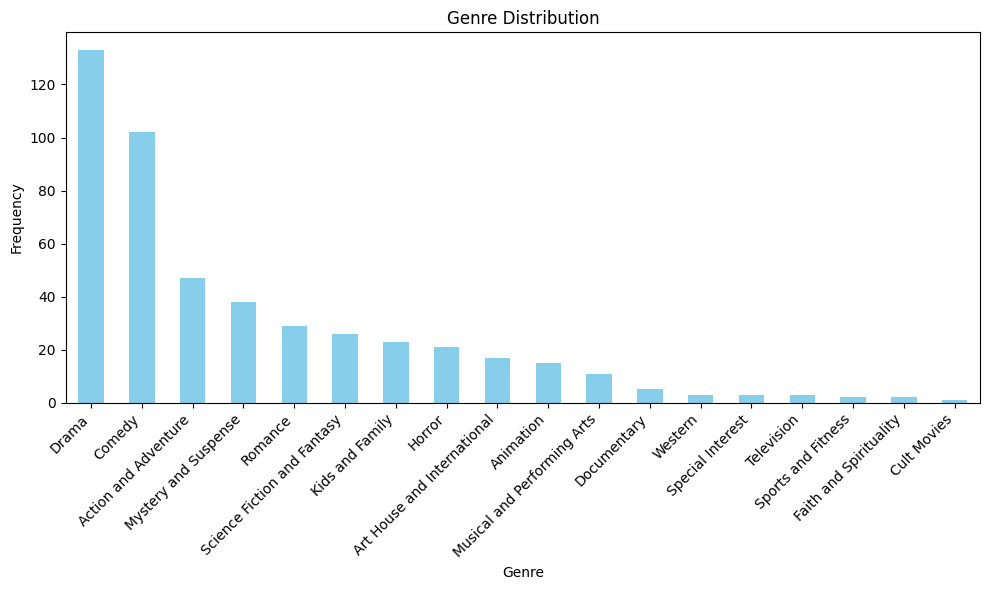

In [80]:

# Splitting combined genres and stacking them into separate rows
genres = rt_movie_info['genre'].str.split('|').apply(pd.Series).stack().reset_index(drop=True)

# Getting the value counts of each genre
genre_counts = genres.value_counts()

# Plotting the genre distribution
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()




In [81]:
#analysing using top 15 directors
top_directors = rt_movie_info['director'].value_counts().head(15)
top_directors

director
Clint Eastwood      3
Sam Mendes          2
Bryan Singer        2
Barry Levinson      2
Ang Lee             2
Seth MacFarlane     2
Gore Verbinski      2
Jay Roach           2
Kasi Lemmons        2
Brian Robbins       2
Thor Freudenthal    2
Yimou Zhang         2
Paul Feig           2
Bruce Beresford     2
David Fincher       2
Name: count, dtype: int64

Movies rated R had the most count(105)and NC had the least(1).Drama films had the most count(33) movies,Action and Adventure|Art House and International had the least count(1).The top 15 top direcors represents directors with multiple credits in dataset.Clint Eastwood having the most counts(3)

In [33]:
rt_reviews


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [34]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [35]:
rt_reviews.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

The dataset has rows that have missing values hence should be cleaned

In [36]:
#cleaning the dataset by dropping rows
rt_reviews.dropna(subset=['review','critic','publisher','rating'], inplace=True)
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013"
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013"


The rows with missing values were dropped

In [37]:
#confirming all rows with missing values have been dropped
rt_reviews.isna().sum()

id            0
review        0
rating        0
fresh         0
critic        0
top_critic    0
publisher     0
date          0
dtype: int64

In [38]:
 #displaying dataset for Box Office Mojo
bom_movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [39]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [40]:
bom_movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [84]:
# Drop rows with missing values in the 'studio' and 'domestic_gross' column
bom_movie_gross.dropna(subset=['studio'], inplace=True)
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [85]:
# Convert 'foreign_gross' column to numeric type
bom_movie_gross['foreign_gross'] = pd.to_numeric(bom_movie_gross['foreign_gross'])

# Replace missing values in 'foreign_gross' with its mean
mean_foreign_gross = bom_movie_gross['foreign_gross'].mean()
bom_movie_gross['foreign_gross'].fillna(mean_foreign_gross, inplace=True)
bom_movie_gross


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,6.520000e+08,2010
1,Alice in Wonderland (2010),BV,334200000.0,6.913000e+08,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,6.643000e+08,2010
3,Inception,WB,292600000.0,5.357000e+08,2010
4,Shrek Forever After,P/DW,238700000.0,5.139000e+08,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,7.513970e+07,2018
3383,Edward II (2018 re-release),FM,4800.0,7.513970e+07,2018
3384,El Pacto,Sony,2500.0,7.513970e+07,2018
3385,The Swan,Synergetic,2400.0,7.513970e+07,2018


Cleaning dataset by dropping rows that have missing values in the studio column and replacing the missing values with the mean of foreign gross column

In [86]:
#confirming that the data has been cleaned
bom_movie_gross.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

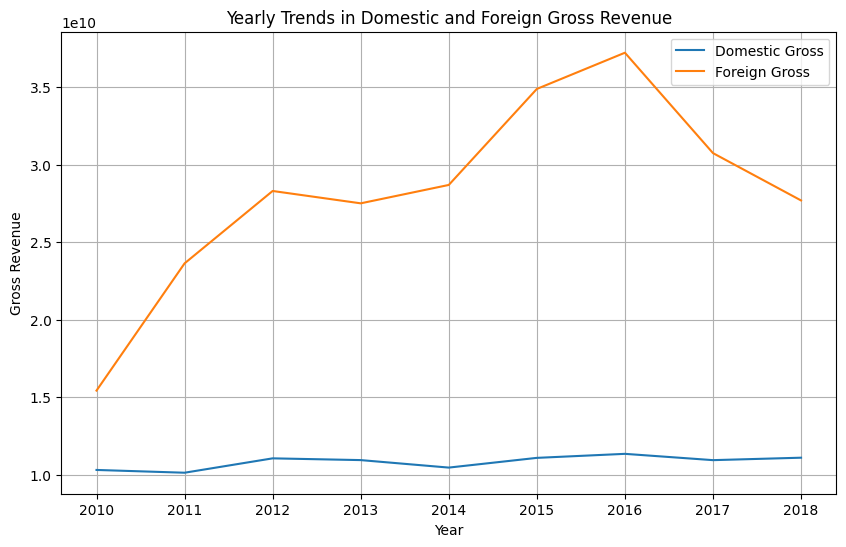

In [82]:
#performing EDA on Box Office Mojo dataset
# Group data by 'year' and calculate the sum of 'domestic_gross' and 'foreign_gross'
yearly_gross = bom_movie_gross.groupby('year')[['domestic_gross', 'foreign_gross']].sum()

# Plotting the trends for domestic and foreign gross over the years
plt.figure(figsize=(10, 6))

# Line plot for domestic gross
plt.plot(yearly_gross.index, yearly_gross['domestic_gross'], label='Domestic Gross')

# Line plot for foreign gross
plt.plot(yearly_gross.index, yearly_gross['foreign_gross'], label='Foreign Gross')

plt.title('Yearly Trends in Domestic and Foreign Gross Revenue')
plt.xlabel('Year')
plt.ylabel('Gross Revenue')
plt.legend()
plt.grid(True)
plt.show()

From the above line graph,The foreign gross is fluctuating, showing irregular peaks over different years.The domestic gross seems more stable or consistent over the years

In [88]:
# Group data by 'title' and calculate the sum of 'domestic_gross' and 'foreign_gross'
movie_gross = bom_movie_gross.groupby('title')[['domestic_gross', 'foreign_gross']].sum()

# Compare domestic and foreign gross earnings for each movie
movie_gross['total_gross'] = movie_gross['domestic_gross'] + movie_gross['foreign_gross']

# Sort by total gross in descending order
movie_gross_sorted = movie_gross.sort_values(by='total_gross', ascending=False)

# Display the comparison from highest to lowest total gross earnings
print(movie_gross_sorted.head(10))  # Displaying top 10 movies by gross earnings


                                             domestic_gross  foreign_gross  \
title                                                                        
Marvel's The Avengers                           623400000.0    895500000.0   
Avengers: Age of Ultron                         459000000.0    946400000.0   
Black Panther                                   700100000.0    646900000.0   
Harry Potter and the Deathly Hallows Part 2     381000000.0    960500000.0   
Star Wars: The Last Jedi                        620200000.0    712400000.0   
Jurassic World: Fallen Kingdom                  417700000.0    891800000.0   
Frozen                                          400700000.0    875700000.0   
Beauty and the Beast (2017)                     504000000.0    759500000.0   
Incredibles 2                                   608600000.0    634200000.0   
Iron Man 3                                      409000000.0    805800000.0   

                                              total_gross  
tit

In [90]:
# Group data by 'studio' and calculate the sum of 'domestic_gross' and 'foreign_gross'
studio_gross = bom_movie_gross.groupby('studio')[['domestic_gross', 'foreign_gross']].sum()

# Compare domestic and foreign gross earnings for each studio
studio_gross['total_gross'] = studio_gross['domestic_gross'] + studio_gross['foreign_gross']

# Sort studios by total gross in descending order
studio_gross_sorted = studio_gross.sort_values(by='total_gross', ascending=False)

# Display the comparison from highest to lowest total gross earnings
print(studio_gross_sorted.head(10))  # Displaying top 10 studios by gross earnings


         domestic_gross  foreign_gross   total_gross
studio                                              
BV         1.841903e+10   2.609441e+10  4.451344e+10
WB         1.216805e+10   1.941930e+10  3.158735e+10
Fox        1.094950e+10   2.020615e+10  3.115565e+10
Uni.       1.290239e+10   1.730561e+10  3.020800e+10
Sony       8.488455e+09   1.424591e+10  2.273437e+10
Par.       7.685871e+09   1.238936e+10  2.007523e+10
WB (NL)    3.995700e+09   6.414140e+09  1.040984e+10
LGF        4.147735e+09   5.609715e+09  9.757450e+09
IFC        1.126629e+08   7.762420e+09  7.875083e+09
Magn.      6.355970e+07   6.591444e+09  6.655004e+09


The output displays the top 10 movies and studios ranked by their total gross.Marvel the Avengers having the highest total gross and BV studio generating the most gross

In [99]:
# SQL query to merge the tables based on 'id'
query = '''
        SELECT *
        FROM rt_movie_info
        INNER JOIN rt_reviews ON rt_movie_info.id = rt_reviews.id
        '''

# Execute the query and fetch the merged results
merged_data = pd.read_sql_query(query, conn)
merged_data



,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,3,"... a movie about a sentient zombie, trapped i...",8,fresh,Philip Martin,0,Arkansas Democrat-Gazette,"September 7, 2012"
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,3,...the bodily invasions are not only reflectiv...,3.5/4,fresh,Josh Larsen,0,LarsenOnFilm,"August 22, 2012"
2,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,3,A black comedy as dry and deadpan as a bleache...,4/4,fresh,John Beifuss,0,"Commercial Appeal (Memphis, TN)","September 10, 2012"
3,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
4,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,3,A flawlessly directed film about enigmatic peo...,2/4,rotten,Roger Ebert,1,Chicago Sun-Times,"August 23, 2012"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17722,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,"Sep 30, 2005","Dec 20, 2005",$,25335935.0,119 minutes,Universal Pictures,1980,is transmuted . . .intact to the big screen wi...,5/5,fresh,Andrea Chase,0,Killer Movie Reviews,"September 8, 2005"
17723,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,"Sep 30, 2005","Dec 20, 2005",$,25335935.0,119 minutes,Universal Pictures,1980,shows the limitations of the small-screen form,3/5,rotten,Chris Barsanti,0,Filmcritic.com,"September 29, 2005"
17724,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,"Oct 5, 2012","Nov 20, 2012",$,1416189.0,129 minutes,Eros Entertainment,1981,A capable supporting cast and a fun cameo from...,3/5,fresh,Anil Sinanan,1,Time Out,"October 23, 2017"
17725,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,"Oct 5, 2012","Nov 20, 2012",$,1416189.0,129 minutes,Eros Entertainment,1981,A winsome if utterly conventional ugly-ducklin...,2/4,rotten,Kate Taylor,1,Globe and Mail,"October 5, 2012"


In [100]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17727 entries, 0 to 17726
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            17727 non-null  int64  
 1   synopsis      17727 non-null  object 
 2   rating        17727 non-null  object 
 3   genre         17727 non-null  object 
 4   director      17727 non-null  object 
 5   writer        17727 non-null  object 
 6   theater_date  17727 non-null  object 
 7   dvd_date      17727 non-null  object 
 8   currency      17727 non-null  object 
 9   box_office    17727 non-null  float64
 10  runtime       17727 non-null  object 
 11  studio        17727 non-null  object 
 12  id            17727 non-null  int64  
 13  review        17727 non-null  object 
 14  rating        17727 non-null  object 
 15  fresh         17727 non-null  object 
 16  critic        17727 non-null  object 
 17  top_critic    17727 non-null  int64  
 18  publisher     17727 non-nu

In [101]:
merged_data.isna().sum()

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
currency        0
box_office      0
runtime         0
studio          0
id              0
review          0
rating          0
fresh           0
critic          0
top_critic      0
publisher       0
date            0
dtype: int64

No missing values in the merged tables

Performing exploratory data analysis on the merged tables



In [105]:
query= """SELECT genre, SUM(box_office) AS total_box_office
FROM rt_movie_info
JOIN rt_reviews ON rt_movie_info.id = rt_reviews.id
GROUP BY genre
ORDER BY total_box_office DESC;
"""
pd.read_sql_query(query, conn)


,genre,total_box_office
0,Action and Adventure|Science Fiction and Fantasy,1.213526e+11
1,Comedy,1.161227e+11
2,Drama,1.109860e+11
3,Action and Adventure|Mystery and Suspense,8.856009e+10
4,Comedy|Romance,7.646509e+10
...,...,...
62,Documentary|Special Interest,4.425962e+07
63,Art House and International|Comedy|Drama,1.319618e+07
64,Art House and International|Drama|Special Inte...,1.201840e+07
65,Documentary|Musical and Performing Arts,1.174211e+07
